Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


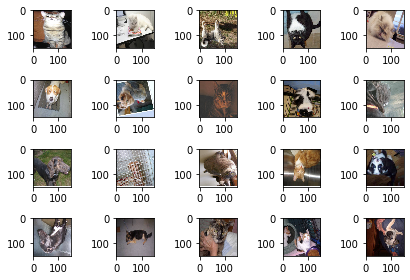

In [1]:
# 증식을 이용한 코드

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = './data/cat_dog_small/train'
validation_dir = './data/cat_dog_small/validation'

# ImageDataGenerator 생성
# train과 validation 을 각각 생성해야 함.
# 정규화(MinMaxScaling 이용)
train_datagen  = ImageDataGenerator(rescale=1/255,
                                    rotation_range=20, # 지정된 각도 범위내에서 임의로 원본 이미지를 회전
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.1, # 1-수치 혹은 1+수치 만큼 확대 및 축소
                                    horizontal_flip=True,
                                    vertical_flip=True)

validation_datagen = ImageDataGenerator(rescale=1/255) # 평가데이터는 증식을 하지 않음.

train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    classes=['cats', 'dogs'],    # cat=0, dog=1 # classes를 안 잡아주면 폴더 순서대로 label이 설정됨.
    target_size=(150,150), # 정사각형태가 고정은 아니지만 보통 정사각형으로 resize함. CNN구조에 따라 resize크기는 달라짐
    batch_size=20,         # 이미지 파일을 한번에 몇개씩 변형할지 폴더 상관없이 랜덤으로 가져옴
    class_mode='binary'    # 다중분류는 categorical (default 값) - (기본 one-hot처리)
                           # 'sparse'도 이용가능
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, # target directory
    classes=['cats', 'dogs'],    # cat=0, dog=1 # classes를 안 잡아주면 폴더 순서대로 label이 설정됨.
    target_size=(150,150), # 정사각형태가 고정은 아니지만 보통 정사각형으로 resize함. CNN구조에 따라 resize크기는 달라짐
    batch_size=20,         # 이미지 파일을 한번에 몇개씩 변형할지 폴더 상관없이 랜덤으로 가져옴
    class_mode='binary'    # 다중분류는 categorical (default 값) - (기본 one-hot처리)
                           # 'sparse'도 이용가능
)

# generator를 이용해보기
# generator는 data를 끊임없이 생성함. for문을 잘 못 돌리면 무한루프에 걸림.
for x_data, t_data in train_generator:
    print(x_data.shape) # (20, 150, 150, 3)
    print(t_data.shape) # (20,)
    break;

# 그림 이미지를 matplotlib을 이용해서 출력
fig = plt.figure()
fig_arr = list()

for i in range(20):
    fig_arr.append(fig.add_subplot(4,5,i+1))

for data_batch, label_batch in train_generator:
    for idx, img_data in enumerate(data_batch):
        fig_arr[idx].imshow(img_data)
    break;

fig.tight_layout()
plt.show()

# 다음 단계는 CNN을 구성하고 학습을 시키는 단계
# 이미지 크기가 크기 때문에 conv layer와 pooling layer를 늘려줘야 함.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=512,
                activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1,
                activation='sigmoid'))
print(model.summary())

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=100, # 1epoch 돌 때 몇번 데이터를 가지고 올것인지
                    epochs=50,   # 전체 데이터를 몇번 epoch돌거냐
                    validation_data = validation_generator,
                    validation_steps=50
                    )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Epoch 44/50
100/100 [==============================] - 17s 171ms/step - loss: 0.4014 - accuracy: 0.7964 - val_loss: 0.4952 - val_accuracy: 0.7580
Epoch 45/50
100/100 [==============================] - 17s 173ms/step - loss: 0.4112 - accuracy: 0.8117 - val_loss: 0.4656 - val_accuracy: 0.7810
Epoch 46/50
100/100 [==============================] - 17s 172ms/step - loss: 0.4280 - accuracy: 0.8035 - val_loss: 0.4755 - val_accuracy: 0.7860
Epoch 47/50
100/100 [==============================] - 17s 171ms/step - loss: 0.4157 - accuracy: 0.8177 - val_loss: 0.4905 - val_accuracy: 0.7640
Epoch 48/50
100/100 [==============================] - 17s 171ms/step - loss: 0.4139 - accuracy: 0.8073 - val_loss: 0.4973 - val_accuracy: 0.7760
Epoch 49/50
100/100 [==============================] - 17s 172ms/step - loss: 0.4139 - accuracy: 0.8105 - val_loss: 0.4678 - val_accuracy: 0.7740
Epoch 50/50
100/100 [==============================] - 17s 172ms/step - loss: 0.4344 - accuracy: 0.7966 - val_loss: 0.4933 -

{'loss': [0.6940528750419617, 0.685879647731781, 0.670531153678894, 0.6505079865455627, 0.6281443238258362, 0.600648820400238, 0.6023039221763611, 0.5775588750839233, 0.5633975863456726, 0.5612420439720154, 0.5512245893478394, 0.5626533031463623, 0.5505912899971008, 0.5391207933425903, 0.5404812097549438, 0.5351465940475464, 0.532254695892334, 0.52494877576828, 0.5273799300193787, 0.5119445323944092, 0.5173062086105347, 0.5108350515365601, 0.5083030462265015, 0.49591371417045593, 0.4960353970527649, 0.501028835773468, 0.488679975271225, 0.4719665050506592, 0.4859757423400879, 0.4677225351333618, 0.4803755283355713, 0.4653171896934509, 0.45629096031188965, 0.4712411165237427, 0.45394134521484375, 0.4746581017971039, 0.46142739057540894, 0.44359326362609863, 0.4372805953025818, 0.43892577290534973, 0.4400711953639984, 0.4624040722846985, 0.43523937463760376, 0.41943877935409546, 0.4264819622039795, 0.4252254366874695, 0.42989322543144226, 0.417550653219223, 0.4204116463661194, 0.41680899

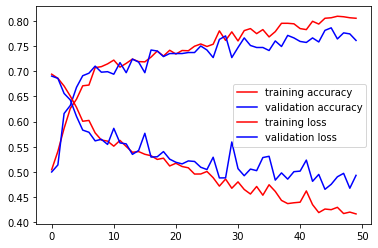

In [3]:
# history 객체를 조사하면 과대적합이 발생했는지 등을 알 수 있음.
print(history.history)
print(history.history.keys())

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_acc, color='r', label='training accuracy') # label은 범례
plt.plot(val_acc, color='b', label='validation accuracy')
plt.legend()  #  범례 표시
# plt.show() # 15 epochs부터는 validation data가 acc이 증가하지 않음.

plt.plot(train_loss, color='r', label='training loss') # label은 범례
plt.plot(val_loss, color='b', label='validation loss')
plt.legend()  #  범례 표시
plt.show() # 15 epochs부터는 validation loss가 줄지 않고 늘어남 (학습의 의미가 없음.)
# 그래프를 보니 과대적합이 발생하는 것을 알 수 있음!
# 데이터가 적기 때문에 overfitting이 발생할 수 밖에 없는 환경임.
